# **Mercado de casas para alquiler en USA**
---

## **Contexto comercial y objetivo comercial**







El alquiler de casas es un mecanismo moderno para lograr obtener  un alojamiento del tipo temporal. Ante la creciente imposibilidad de aspirar hacia la obtención de una casa propia, el mercado de alquileres se consolidó como una de las soluciones más rápidas para resolver este problema y por lo cual, con el crecimiento poblacional vemos que es necesario generar cada vez más información para las personas que están entrando en esa etapa de su vida, en la cual aspiran hacia la independencia de su hogar, en criollo, "Abandonar el nido".A su vez cabe recalcar que cada vez mas se esta generando movimiento entre diferentes locaciones para llevar a cabo trabajos tanto presencial como con la modalidad homeoffice la cual a partir de la pandemia de Covid-19 se vio creciencido de manera exponencial. 
También la creación de esta información es factible de ser utilizada para promocionar su alquiler o alquileres, a las personas que dispongan de la posibilidad de alquilar departamentos, casas, etc. El presente dataset fue seleccionado en base a las posibilidades de análisis que brinda. Es interesante saber cómo se conforma el mercado de alquileres de casas en un país tan extenso como USA, donde podemos ver cómo interactúan diferentes variables en diferentes contextos. Las variables interesantes a analizar son varias en el presente dataset. A la hora de evaluar posibles personas que alquilen en el mercado de casas es importante dar información del precio, el tipo de vivienda, así como la región, el tamaño de la casa, los dormitorios, baños, acceso para discapacitados, que se está ofreciendo. Pero también es importante dar detalles sobre las posibilidades tales como poder tener gatos, perros, la cercanía a ciertos servicios para las personas, etc. Esta información es importante para los que alquilan las casas que están a la espera de maximizar sus ganancias así como empresas que generan información para luego vendersela a diferentes personas.

**Objetivo del algoritmo a realizar**

Poder predecir el precio de una casa en base a las caracteristicas que presenta para ser utilizado por las personas que tienen la posibilidad de poner inmuebles para alquilar y asi generar reditos economicos. Y tambien para aquellas personas que estan buscando un alquiler y poder predecir un precio de lo que le saldria en base a las caracteristicas buscadas.

**Algunas preguntas de interes para trabajar con el presente dataset podrian ser:**

1) ¿Existe alguna relacion entre el precio del alquiler con el tamaño en pies cuadrados?

2) ¿Hay diferencias en el precio de alquiler en base al Estado que se alquile?

3) ¿La posibilidad de tener animales aumenta el precio del alquiler?

4) ¿Cual es el tipo de alquiler predominante?

5) ¿La posibilidad de fumar en el alquiler aumenta el precio?

**Como hipotesis podemos plantear:**

1) Existe una relacion positiva entre el precio de los alquileres y el tamaño de los mismos, medido en pies cuadrados.

2) La posibilidad de tener animales, poder fumar, etc. Se relaciona de manera positiva con el precio.


### **Pasamos a ver los datos**

---


Importamos el dataset directamente desde nuestro drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import numpy as np
import requests
Data1 = pd.read_csv('/content/drive/MyDrive/Entrega N1 Data Science/Casas USA/housing.csv', index_col=0) 
Data1.head(5)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,url,region,region_url,price,type,sqfeet,beds,baths,cats_allowed,dogs_allowed,...,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,image_url,description,lat,long,state
id,,,,,,,,,,,,,,,,,,,,,
7049044568,https://reno.craigslist.org/apa/d/reno-beautif...,reno / tahoe,https://reno.craigslist.org,1148,apartment,1078,3,2.0,1,1,...,0,0,0,w/d in unit,carport,https://images.craigslist.org/01616_daghmBUvTC...,Ridgeview by Vintage is where you will find al...,39.5483,-119.796,ca
7049047186,https://reno.craigslist.org/apa/d/reno-reduced...,reno / tahoe,https://reno.craigslist.org,1200,condo,1001,2,2.0,0,0,...,0,0,0,w/d hookups,carport,https://images.craigslist.org/00V0V_5va0MkgO9q...,Conveniently located in the middle town of Ren...,39.5026,-119.789,ca
7043634882,https://reno.craigslist.org/apa/d/sparks-state...,reno / tahoe,https://reno.craigslist.org,1813,apartment,1683,2,2.0,1,1,...,0,0,0,w/d in unit,attached garage,https://images.craigslist.org/00t0t_erYqC6LgB8...,2BD | 2BA | 1683SQFTDiscover exceptional servi...,39.6269,-119.708,ca
7049045324,https://reno.craigslist.org/apa/d/reno-1x1-fir...,reno / tahoe,https://reno.craigslist.org,1095,apartment,708,1,1.0,1,1,...,0,0,0,w/d in unit,carport,https://images.craigslist.org/00303_3HSJz75zlI...,MOVE IN SPECIAL FREE WASHER/DRYER WITH 6 OR 12...,39.4477,-119.771,ca
7049043759,https://reno.craigslist.org/apa/d/reno-no-long...,reno / tahoe,https://reno.craigslist.org,289,apartment,250,0,1.0,1,1,...,1,0,1,laundry on site,NaN,https://images.craigslist.org/01616_fALAWFV8zQ...,"Move In Today: Reno Low-Cost, Clean & Furnishe...",39.5357,-119.805,ca


Analizamos la forma del dataset:

In [ ]:
Data1.shape


(384977, 21)

Hay 384977 filas y 21 columnas en total

La cantidad de datos disponibles es la siguiente:

In [ ]:
Data1.size

8084517

Observamos si hay duplicados:

In [ ]:
Data1.duplicated()

id
7049044568    False
7049047186    False
7043634882    False
7049045324    False
7049043759    False
              ...  
7049053337    False
7049052968    False
7049050454    False
7049050149    False
7049050010    False
Length: 384977, dtype: bool

Creamos un nuevo objeto realizando el descarte de los duplicados

In [ ]:
Data2 = Data1.drop_duplicates()
Data2.head(5)

,url,region,region_url,price,type,sqfeet,beds,baths,cats_allowed,dogs_allowed,...,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,image_url,description,lat,long,state
id,,,,,,,,,,,,,,,,,,,,,
7049044568,https://reno.craigslist.org/apa/d/reno-beautif...,reno / tahoe,https://reno.craigslist.org,1148,apartment,1078,3,2.0,1,1,...,0,0,0,w/d in unit,carport,https://images.craigslist.org/01616_daghmBUvTC...,Ridgeview by Vintage is where you will find al...,39.5483,-119.796,ca
7049047186,https://reno.craigslist.org/apa/d/reno-reduced...,reno / tahoe,https://reno.craigslist.org,1200,condo,1001,2,2.0,0,0,...,0,0,0,w/d hookups,carport,https://images.craigslist.org/00V0V_5va0MkgO9q...,Conveniently located in the middle town of Ren...,39.5026,-119.789,ca
7043634882,https://reno.craigslist.org/apa/d/sparks-state...,reno / tahoe,https://reno.craigslist.org,1813,apartment,1683,2,2.0,1,1,...,0,0,0,w/d in unit,attached garage,https://images.craigslist.org/00t0t_erYqC6LgB8...,2BD | 2BA | 1683SQFTDiscover exceptional servi...,39.6269,-119.708,ca
7049045324,https://reno.craigslist.org/apa/d/reno-1x1-fir...,reno / tahoe,https://reno.craigslist.org,1095,apartment,708,1,1.0,1,1,...,0,0,0,w/d in unit,carport,https://images.craigslist.org/00303_3HSJz75zlI...,MOVE IN SPECIAL FREE WASHER/DRYER WITH 6 OR 12...,39.4477,-119.771,ca
7049043759,https://reno.craigslist.org/apa/d/reno-no-long...,reno / tahoe,https://reno.craigslist.org,289,apartment,250,0,1.0,1,1,...,1,0,1,laundry on site,NaN,https://images.craigslist.org/01616_fALAWFV8zQ...,"Move In Today: Reno Low-Cost, Clean & Furnishe...",39.5357,-119.805,ca


Verificamos si han sido eliminados duplicados

In [ ]:
Data2.shape

(384977, 21)

Seguimos con la misma cantidad de datos

In [ ]:
Data2.size

8084517

Podemos corroborar haciendo una resta entre los tamaños de cada objeto definido como data:

In [ ]:
Datacomp = Data2.size - Data1.size
Datacomp

0

Generamos un dataframe a partir de la data con los datos duplicados eliminados

In [ ]:
df = pd.DataFrame(Data2)
df=df.drop(["url","region_url","image_url","description"],axis=1)
df.head(5)

,region,price,type,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,lat,long,state
id,,,,,,,,,,,,,,,,,
7049044568,reno / tahoe,1148,apartment,1078,3,2.0,1,1,0,0,0,0,w/d in unit,carport,39.5483,-119.796,ca
7049047186,reno / tahoe,1200,condo,1001,2,2.0,0,0,0,0,0,0,w/d hookups,carport,39.5026,-119.789,ca
7043634882,reno / tahoe,1813,apartment,1683,2,2.0,1,1,1,0,0,0,w/d in unit,attached garage,39.6269,-119.708,ca
7049045324,reno / tahoe,1095,apartment,708,1,1.0,1,1,1,0,0,0,w/d in unit,carport,39.4477,-119.771,ca
7049043759,reno / tahoe,289,apartment,250,0,1.0,1,1,1,1,0,1,laundry on site,NaN,39.5357,-119.805,ca


Analizamos un poco de las columnas contenidas:

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 384977 entries, 7049044568 to 7049050010
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   region                   384977 non-null  object 
 1   price                    384977 non-null  int64  
 2   type                     384977 non-null  object 
 3   sqfeet                   384977 non-null  int64  
 4   beds                     384977 non-null  int64  
 5   baths                    384977 non-null  float64
 6   cats_allowed             384977 non-null  int64  
 7   dogs_allowed             384977 non-null  int64  
 8   smoking_allowed          384977 non-null  int64  
 9   wheelchair_access        384977 non-null  int64  
 10  electric_vehicle_charge  384977 non-null  int64  
 11  comes_furnished          384977 non-null  int64  
 12  laundry_options          305951 non-null  object 
 13  parking_options          244290 non-null  obje

Los valores de cada columna con un poco mas de detalle:

In [ ]:
df.describe()

,price,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,lat,long
count,3.849770e+05,3.849770e+05,384977.000000,384977.000000,384977.000000,384977.000000,384977.000000,384977.000000,384977.000000,384977.000000,383059.000000,383059.000000
mean,8.825722e+03,1.059900e+03,1.905345,1.480718,0.726890,0.707918,0.731771,0.082111,0.012871,0.048128,37.233487,-92.700631
std,4.462200e+06,1.915076e+04,3.494572,0.618061,0.445557,0.454721,0.443038,0.274535,0.112718,0.214036,5.546171,16.531980
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-43.533300,-163.894000
25%,8.050000e+02,7.500000e+02,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,33.454700,-100.775000
50%,1.036000e+03,9.490000e+02,2.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,37.647800,-87.745100
75%,1.395000e+03,1.150000e+03,2.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,41.138300,-81.179600
max,2.768307e+09,8.388607e+06,1100.000000,75.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,102.036000,172.633000


*Desglozamos un poco mas las columnas para ver los valores que la conforman*

In [ ]:
df.beds.value_counts()

2       175513
1       117226
3        67037
4        11575
0        10978
5         2324
6          240
7           49
8           31
1000         2
1100         2
Name: beds, dtype: int64

In [ ]:
df.baths.value_counts()

1.0     198184
2.0     134649
1.5      27363
2.5      13162
3.0       5549
0.0       3107
4.0       1495
3.5       1007
4.5        231
5.0        131
5.5         57
6.0         26
7.0          4
6.5          4
75.0         2
7.5          2
8.5          1
35.0         1
8.0          1
25.0         1
Name: baths, dtype: int64

Viendo el conteo de datos anterior podemos verificar la existencia de casas que poseen 1.5 baños, 2.5 baños, luego de investigar sobre el tema, existen los medio baños, pero para nuestro analisis los omitiremos para poder analizar casas que en sus baños contengan regaderas y asi las personas puedan cumplir con sus necesidades. 

In [ ]:
df["baths"]=df["baths"].astype("int")
df.baths.value_counts()

1     225547
2     147811
3       6556
0       3107
4       1726
5        188
6         30
7          6
8          2
75         2
35         1
25         1
Name: baths, dtype: int64

In [ ]:
df.cats_allowed.value_counts()

1    279836
0    105141
Name: cats_allowed, dtype: int64

In [ ]:
df.dogs_allowed.value_counts()

1    272532
0    112445
Name: dogs_allowed, dtype: int64

In [ ]:
df.smoking_allowed.value_counts()

1    281715
0    103262
Name: smoking_allowed, dtype: int64

In [ ]:
df.wheelchair_access.value_counts()

0    353366
1     31611
Name: wheelchair_access, dtype: int64

In [ ]:
df.electric_vehicle_charge.value_counts()

0    380022
1      4955
Name: electric_vehicle_charge, dtype: int64

In [ ]:
df.comes_furnished.value_counts()

0    366449
1     18528
Name: comes_furnished, dtype: int64

In [ ]:
df.laundry_options.value_counts()

w/d in unit           131783
w/d hookups            75568
laundry on site        58873
laundry in bldg        36103
no laundry on site      3624
Name: laundry_options, dtype: int64

In [ ]:
df.parking_options.value_counts()

off-street parking    128502
attached garage        40591
carport                38955
detached garage        16940
street parking         15951
no parking              3188
valet parking            163
Name: parking_options, dtype: int64

Pasamos a ver si hay valores nulos contenidos en las columnas:

In [ ]:
df.isna().sum()

region                          0
price                           0
type                            0
sqfeet                          0
beds                            0
baths                           0
cats_allowed                    0
dogs_allowed                    0
smoking_allowed                 0
wheelchair_access               0
electric_vehicle_charge         0
comes_furnished                 0
laundry_options             79026
parking_options            140687
lat                          1918
long                         1918
state                           0
dtype: int64

Para no generar tanto problema podriamos eliminar los registros o rellenarlos con un valor, en este caso se selecciono el valor 0

In [ ]:
df1 = df
df1 = df.fillna(0)
df1.isna().sum()


region                     0
price                      0
type                       0
sqfeet                     0
beds                       0
baths                      0
cats_allowed               0
dogs_allowed               0
smoking_allowed            0
wheelchair_access          0
electric_vehicle_charge    0
comes_furnished            0
laundry_options            0
parking_options            0
lat                        0
long                       0
state                      0
dtype: int64

### **Graficos**

---

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
import numpy as np

Empezaremos viendo la distribucion del precio a traves de un grafico de caja

<Axes: xlabel='price'>

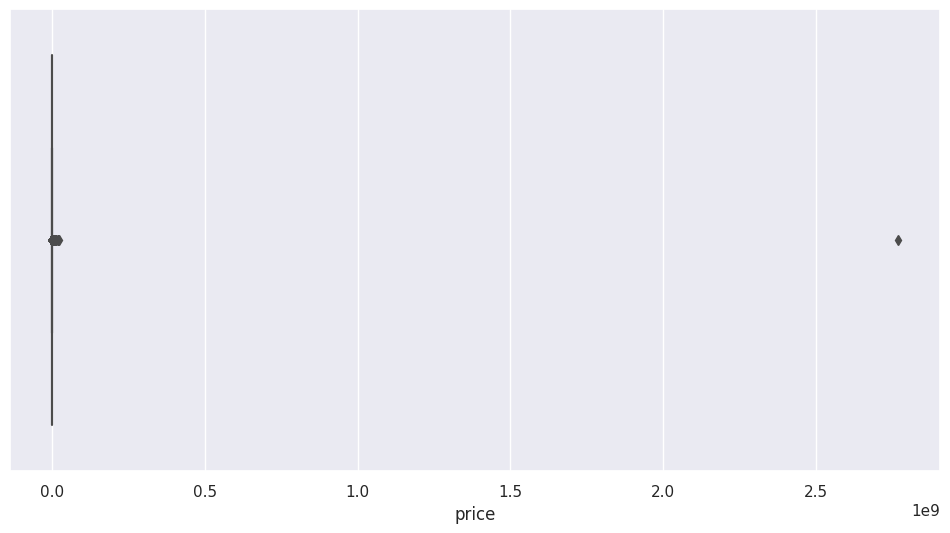

In [ ]:
plt.figure(figsize=(12,6))
x=df1['price']
sns.boxplot(data=df1,x = 'price', showfliers=True)

Claramente estamos en la presencia de outliers de muy elevado valor, esto nos generara problemas

Analizamos en que valores caen los cuartiles de la columna precio:

In [ ]:
q1, q2, q3 = df1['price'].quantile([0.25, 0.50, 0.75])
q1, q2, q3

(805.0, 1036.0, 1395.0)

In [ ]:
df_quartiles = pd.DataFrame({'Q1': q1, 'Q2': q2, 'Q3': q3}, index=['price'])

print(df_quartiles)

          Q1      Q2      Q3
price  805.0  1036.0  1395.0


Se puede apreciar que el cuartil número 1 (osea el 25%), llega hasta $805 usd.

La mediana o el cuartil número 2 hasta $1036 usd. 

Por ultimo el 75% de la muestra, osea el cuartil número 3, llega hasta los $1395 usd.

El rango intercuartil es de:

In [ ]:
iqr = q3 - q1
iqr

590.0

$590 usd.

Definiendo los limites superiores e inferiores aplicando 1.5 veces el valor del rango intercuartil para definir los bigotes:

In [ ]:
li = q1 - 1.5*iqr
ls = q3 + 1.5*iqr
print('Limite superior', ls , '\nLimite inferior', li)

Limite superior 2280.0 
Limite inferior -80.0


Un alquier no puede tener valor negativo a menos que te paguen por vivir en un alojamiento, lo cual a menos que sea algun tipo de trabajo no pasa en la realidad

In [ ]:
df1['price'].min()

0

Viendo el valor minimo que deberia ser el valor del limite inferior y observando que tiene valor 0, lo cual resultaria en un alquier gratuito (cosa que no pasa en la realidad), se establecera el valor arbitrario de $100 usd al mes para lo minimo a pagar

Realizamos el mismo procedimiento para los pies cuadrados

In [ ]:
q1, q2, q3 = df1['sqfeet'].quantile([0.25, 0.50, 0.75])
q1, q2, q3

(750.0, 949.0, 1150.0)

In [ ]:
iqr = q3 - q1
iqr

400.0

In [ ]:
li = q1 - 1.5*iqr
ls = q3 + 1.5*iqr
print('Limite superior', ls , '\nLimite inferior', li)

Limite superior 1750.0 
Limite inferior 150.0


Viendo los valores maximos de pies cuadrados y precios podemos decir que hay valores atipicos. El criterio en el que me baso, ademas de establecer cuales son los cuartiles y el rango intercuartil, ademas de los valores del limite superior e inferior, es ver el valor maximo de ambas columnas, el cual si vemos hasta el 75% de la muestra el precio llega hasta $1395 y luego el maximo se encuentra alojado en un numero con nueve ceros luego de la coma, lo cual no tiene logica a pagar por un alquiler a menos que la persona que lo busque sea millonario. Por el lado de los pies cuadrados podemos ver que el 75% de la muestra llega hasta 1150 pies, donde luego nuevamente el maximo se aloja en un numero con 6 ceros luego de la coma, provocando otra ves problemas para el analisis posterior. Por ende tomo los siguientes recaudos, atado a posteriores modificaciones de ser necesario, para poder empezar con los graficos.Tambien tenemos algunas preguntas como por ejemplo, quien alquilaria una casa con 75 baños, 35 baños o 25 baños. Suponiendo que la persona sea adinerada y se pudiera dar el lujo de alquilar alguna de las casas disponibles, el tener mas de 7 baños ya seria una casa totalmente excesiva para que viva cualquier familia. Por ende vamos a tener que modificar algunas cosas. Lo mismo sucede cuando hablamos de las camas, vemos que hay registros con mas de 1000 camas disponibles, una locura, a menos que se alquile un hotel entero.

In [ ]:
limpieza1 = ((df["beds"]>7) | (df["baths"]>7) | (df["sqfeet"]<150) | (df["sqfeet"]>3000) | (df["price"]<100) | (df["price"]>2500))
df1 = df1[~limpieza1]

Analizando los precios nuevamente

Text(0.5, 0, 'Precio')

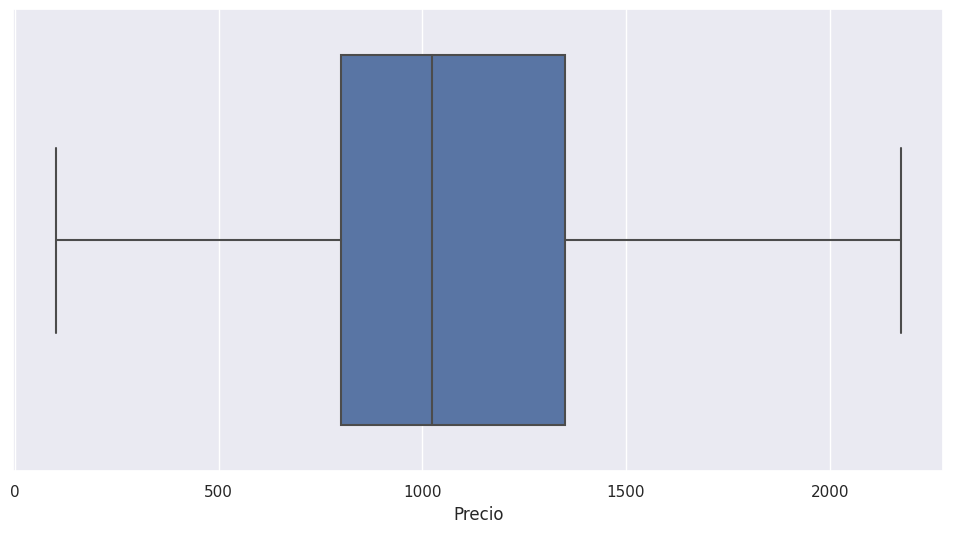

In [ ]:
plt.figure(figsize=(12,6))
x=df1['price']
sns.boxplot(data=df1,x = 'price', showfliers=False)
plt.xlabel('Precio')

Text(0.5, 0, 'Pies cuadrados')

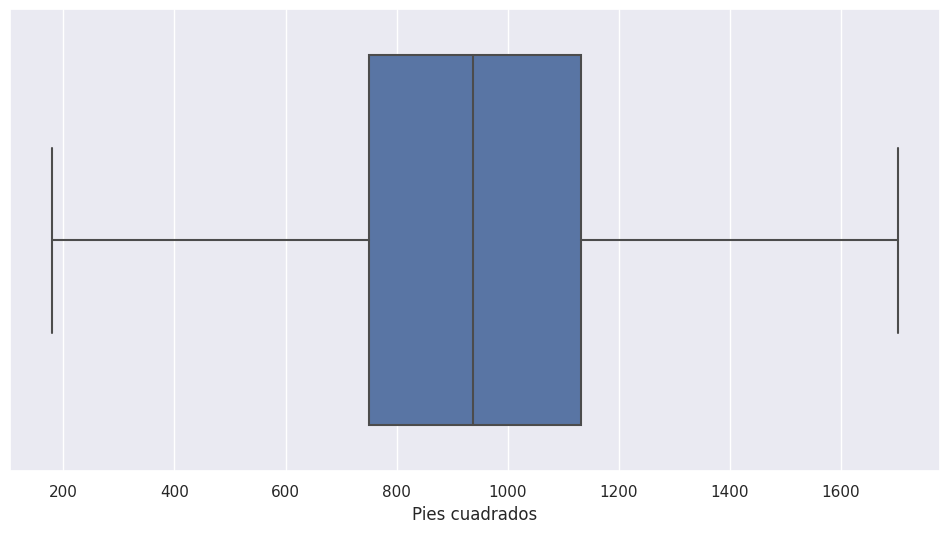

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df1,x = 'sqfeet', showfliers=False)
plt.xlabel('Pies cuadrados')

Con todas estas consideraciones podemos comenzar a realizar los analisis correspondientes para dar respuestas a las interrogantes planteadas

Text(0.5, 1.0, 'Alquileres disponibles por estados')

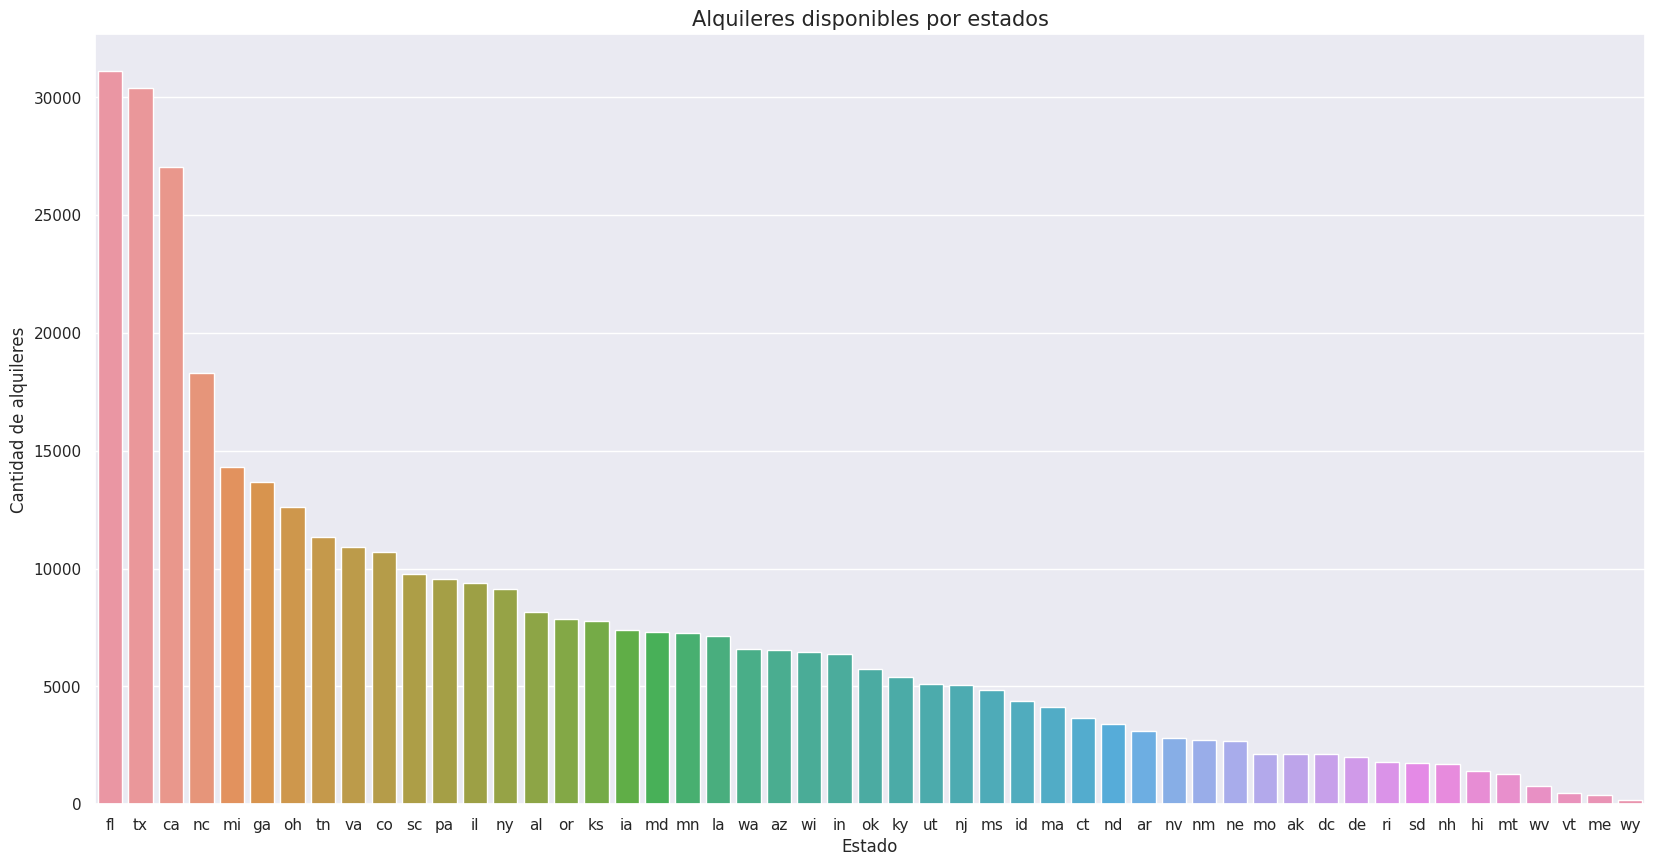

In [ ]:
grouped1 = df1.groupby('state')['state'].count()
grouped1 = grouped1.sort_values(ascending=False)

sns.barplot(x=grouped1.index, y=grouped1.values, order=grouped1.index)
fig = plt.gcf()
fig.set_size_inches(20,10)
plt.xlabel('Estado', size=12)
plt.ylabel('Cantidad de alquileres', size=12)
plt.title('Alquileres disponibles por estados', size=15)

In [ ]:
count_dict = df1.state.value_counts().to_dict()
df_state1 = pd.DataFrame(list(count_dict.items()), columns=['state', 'count'])
df_state1 = df_state1.rename(columns={'state': 'Estado', 'count': 'Cantidad de alquileres'})
df_state2 = df_state1.style.hide_index()
df_state2


<ipython-input-165-b913164d4ec2>:4: FutureWarning: this method is deprecated in favour of `Styler.hide(axis="index")`
  df_state2 = df_state1.style.hide_index()


Estado,Cantidad de alquileres
fl,31125
tx,30414
ca,27047
nc,18300
mi,14318
ga,13691
oh,12637
tn,11346
va,10900
co,10703


Observando el grafico anterior, podemos ver que en tres estados sobrepasan facilmente la barrera de los 25000 alquileres disponibles. Los cuales son el estado de Florida, Texas y California. Seguidos por Carolina del Norte y Michigan, completando asi el top 5 de Estados con mayor disponibilidad de alquileres.

Con el grafico anterior es posible aconsejar a las personas que esten en busca de un alquiler que tengan como referencia los estados con mayores posibilidades de alquiler para asi tener mas opciones a la hora de buscar.
Por el lado de las empresas inmobiliarias, es importante tener nocion tambien de lo mismo porque aumentaria las posibilidades de que ellos ofrezcan esos alquileres a las personas que estan en la busqueda de una vivienda. 

Pasamos a analizar el tipo de alquiler predominante:

In [ ]:
df1['type'] = df1['type'].replace({'apartment': 'Apartamento', 'condo': 'Condominio', 'house': 'Casa', 'townhouse': 'Casa Adosada', 'manufactured': 'Pre-fabricada', 'cottage/cabin': 'Cabaña', 'flat':'Piso', 'in-law' : 'Vivienda Secundaria', 'land' : 'Tierra', 'assisted living' : 'Vivienda con Asistencia', 'loft': 'Loft', 'duplex' :'Duplex'})

Text(0.5, 1.0, 'Tipos de alquileres disponibles')

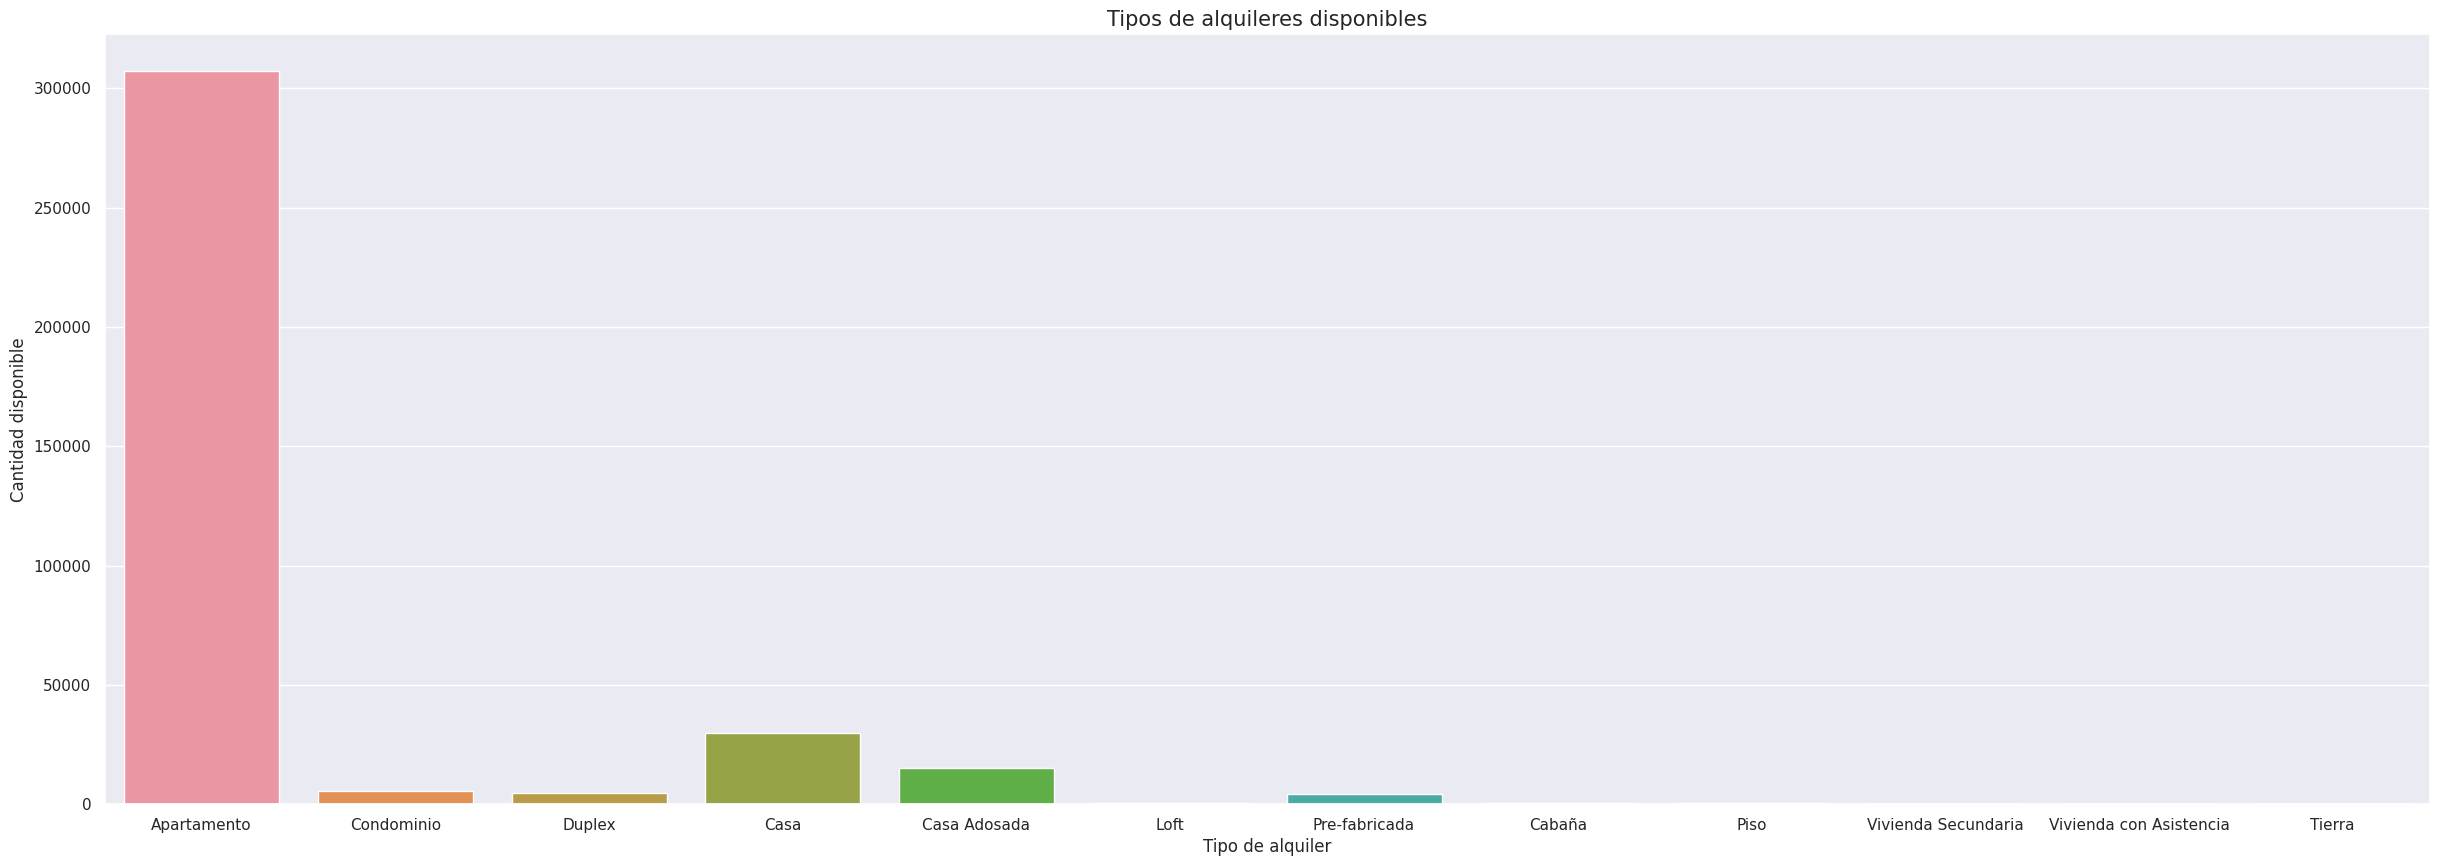

In [ ]:
sns.countplot(df1, x='type')
fig = plt.gcf()
fig.set_size_inches(30,10)
plt.xlabel('Tipo de alquiler', size=(12))
plt.ylabel('Cantidad disponible', size=(12))
plt.title('Tipos de alquileres disponibles', size=(15))

Viendo el grafico generado es posible notar la abismal diferencia entre las posibilidades de alquilar un departamento, ya que abundan en el presente conjunto de datos.Las casas son la segunda opcion mas presente en el dataset.

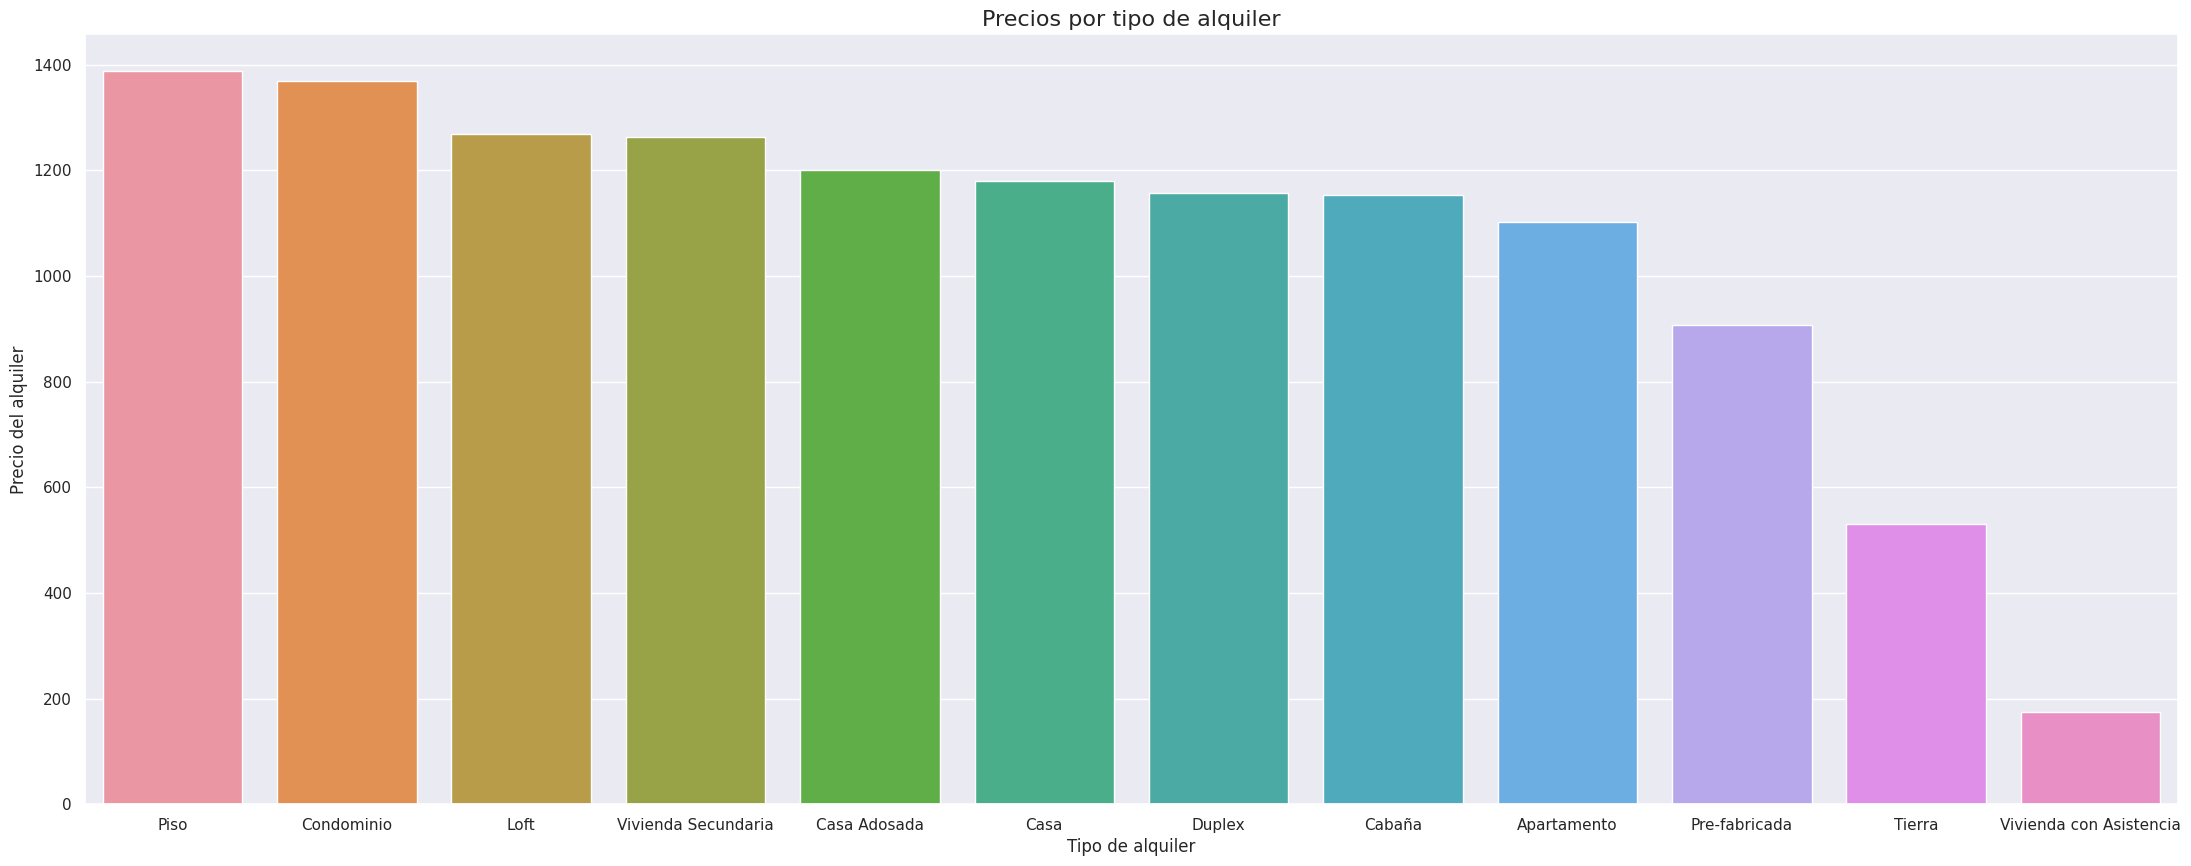

In [ ]:
grouped = df1.groupby('type')['price'].mean()
grouped = grouped.sort_values(ascending=False)

sns.barplot(x=grouped.index, y=grouped.values)
fig = plt.gcf()
fig.set_size_inches(27, 10)
plt.xlabel('Tipo de alquiler', size=12)
plt.ylabel('Precio del alquiler', size=12)
plt.title('Precios por tipo de alquiler', size=16)
plt.show()

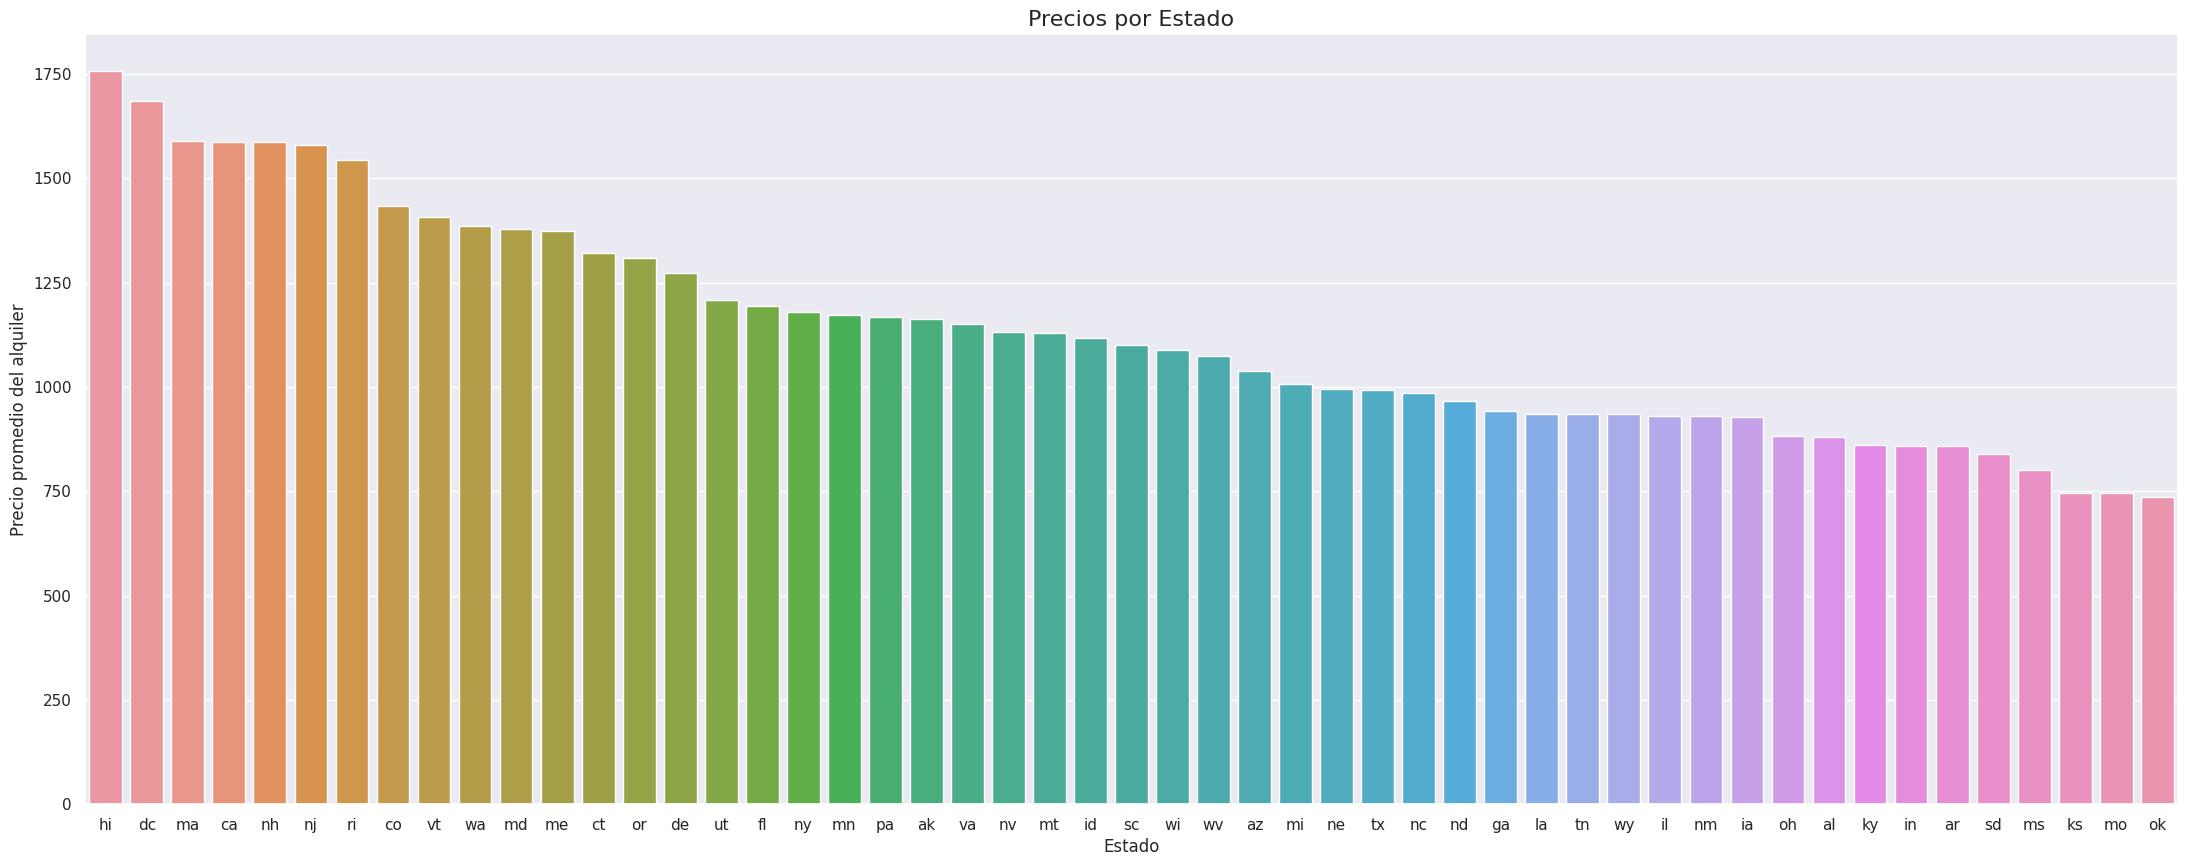

In [ ]:
grouped = df1.groupby('state')['price'].mean()
grouped = grouped.sort_values(ascending=False)

sns.barplot(x=grouped.index, y=grouped.values)
fig = plt.gcf()
fig.set_size_inches(27, 10)
plt.xlabel('Estado', size=12)
plt.ylabel('Precio promedio del alquiler', size=12)
plt.title('Precios por Estado', size=16)
plt.show()

Al ver la grafica se puede apreciar que Hawai (hi) es el estado mas caro en promedio para alquilar. Seguido a este, se encuentran el distrito federal (dc) y california.

En base a lo anterior podemos decir que para las personas que buscan un alquiler deberian analizar la posibilidad de ir a lugares como Oklahoma, Misuri que son de los lugares mas baratos, en promedio, para poder alquilar y si es que su tipo de trabajo tambien los deja, aunque hoy en dia con la modalidad de homeoffice es mucho mas facil trabajar a distancia.

Por el lado de los inversionistas, esta claro que Hawai es un lugar para vacionar, donde entonces pueden realizar ciertas inversiones para la creacion de viviendas y asi poder obtener ganacias en las temporadas altas, donde las personas busquen vacacionar con un alojamiento en esa isla. 

¿Que sucede en cuanto a la relacion entre pies cuadrados disponibles por alquiler y el precio que presenta el mismo? Analizaremos ahora si existe alguna relacion entre ambas variables, para determinar si es posible afirmar que a mayor cantidad de pies cuadrados nos encontraremos con un mayor precio del alquiler.

Text(0.5, 1.0, 'Relacion entre pies cuadrados y precio')

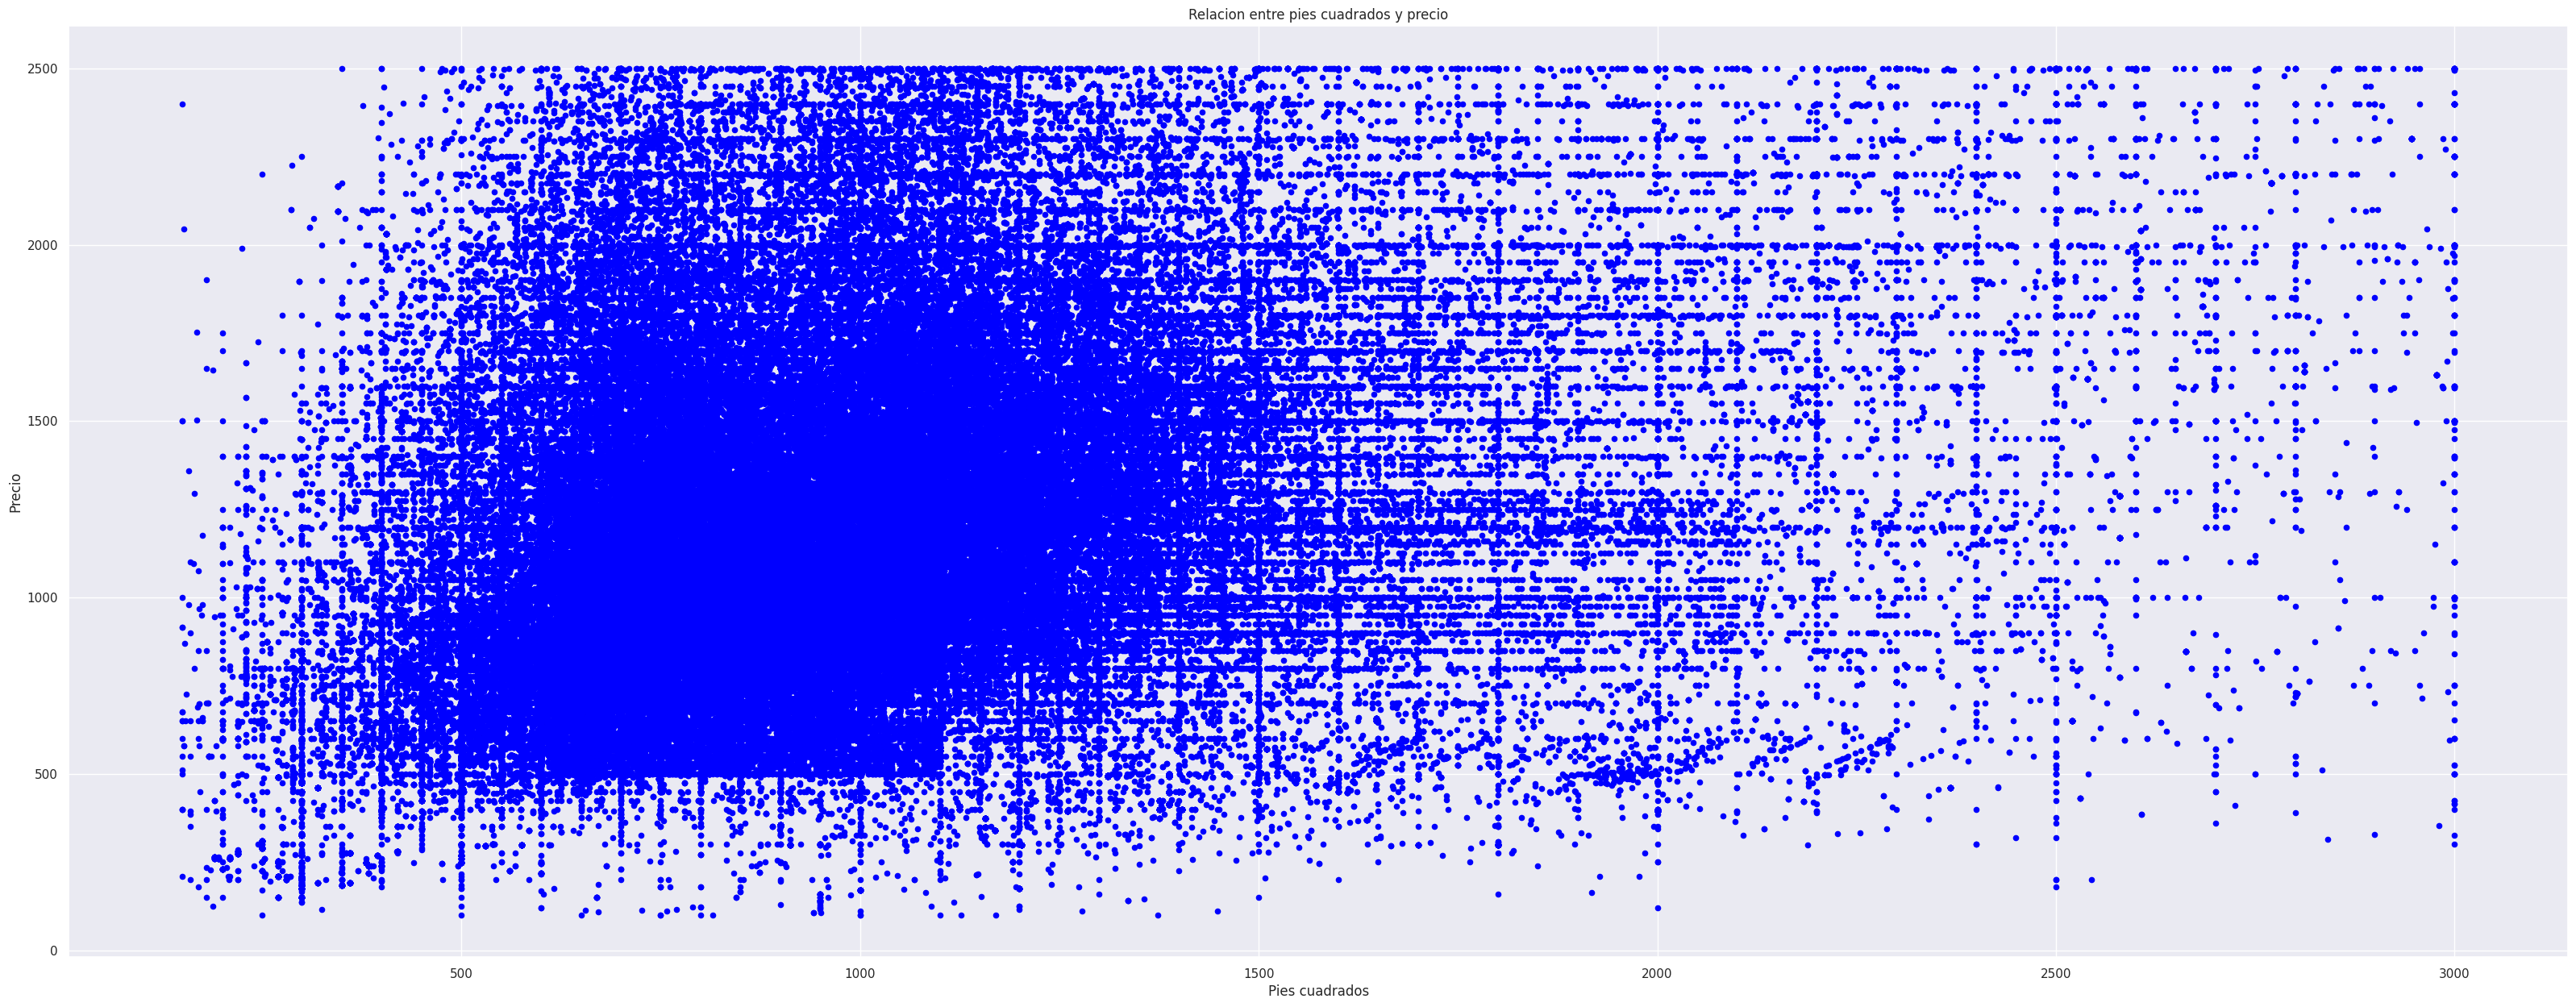

In [ ]:
df1.plot(kind='scatter', x='sqfeet', y='price',figsize=(40,15), c='blue')
plt.xlabel('Pies cuadrados', size=(12))
plt.ylabel('Precio', size=(12))
plt.title('Relacion entre pies cuadrados y precio')

En el grafico anterior no es posible visualizar ningun tipo de relacion entre la distribucion del precio y de los pies cuadrados, por ende no estamos en condiciones de confirmar ningun tipo de relacion entre ambos. 

Y en cuanto a la posibilidad de tener animales en el alquiler, ¿Aumentara el precio?

In [ ]:
reemplazo = {0: 'No permite', 1: 'Permite'}
df1['dogs_allowed'] = df1['dogs_allowed'].replace(reemplazo)
df1['cats_allowed'] = df1['cats_allowed'].replace(reemplazo)
df1['smoking_allowed'] = df1['smoking_allowed'].replace(reemplazo)

Text(0.5, 1.0, 'Distribucion de los precios por poder tener perros')

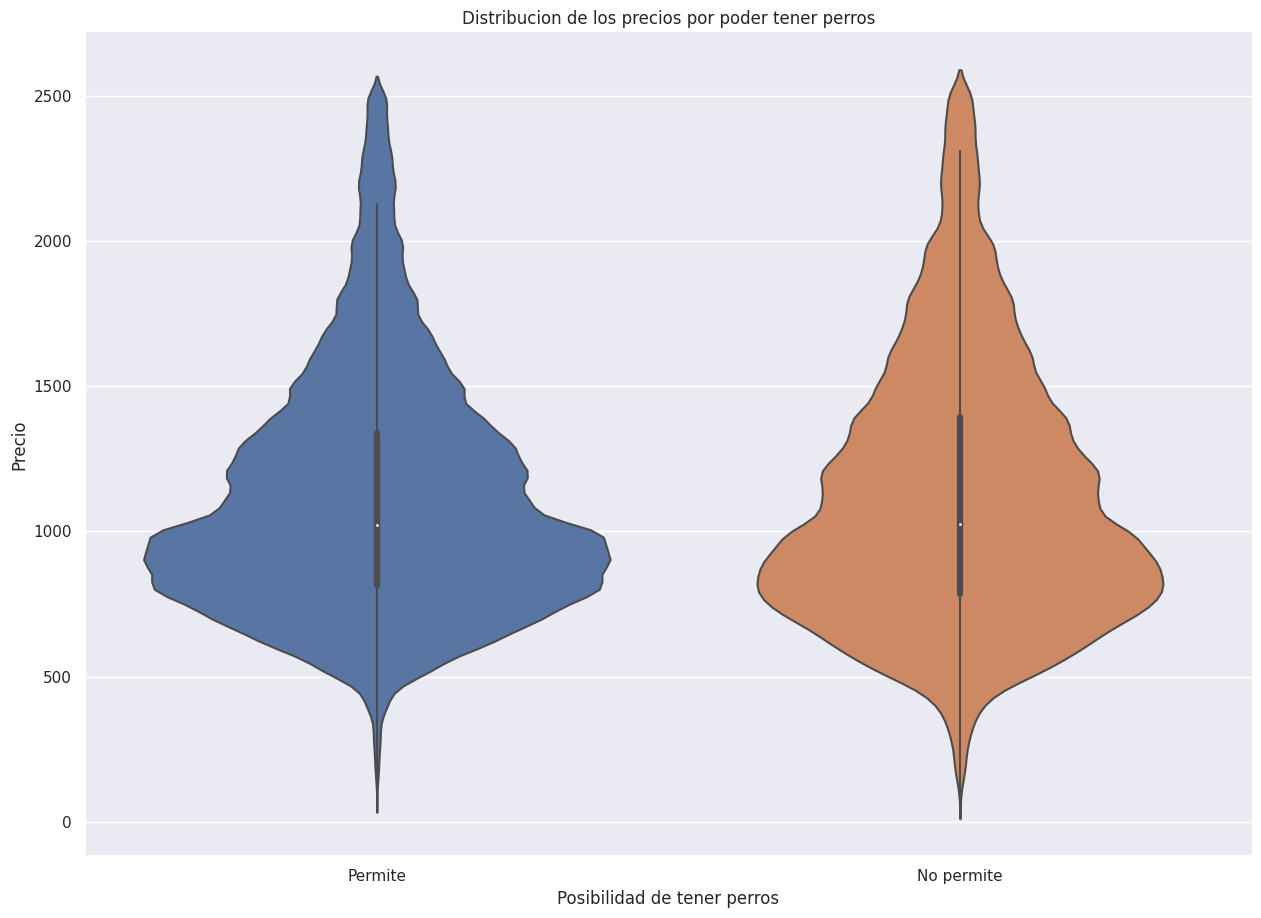

In [ ]:
sns.catplot(x = "dogs_allowed", y = "price", data = df1, kind = "violin")
fig = plt.gcf()
fig.set_size_inches(15,10)
plt.xlabel('Posibilidad de tener perros', size=(12))
plt.ylabel('Precio', size=(12))
plt.title('Distribucion de los precios por poder tener perros')

Text(0.5, 1.0, 'Distribucion de los precios por poder tener gatos')

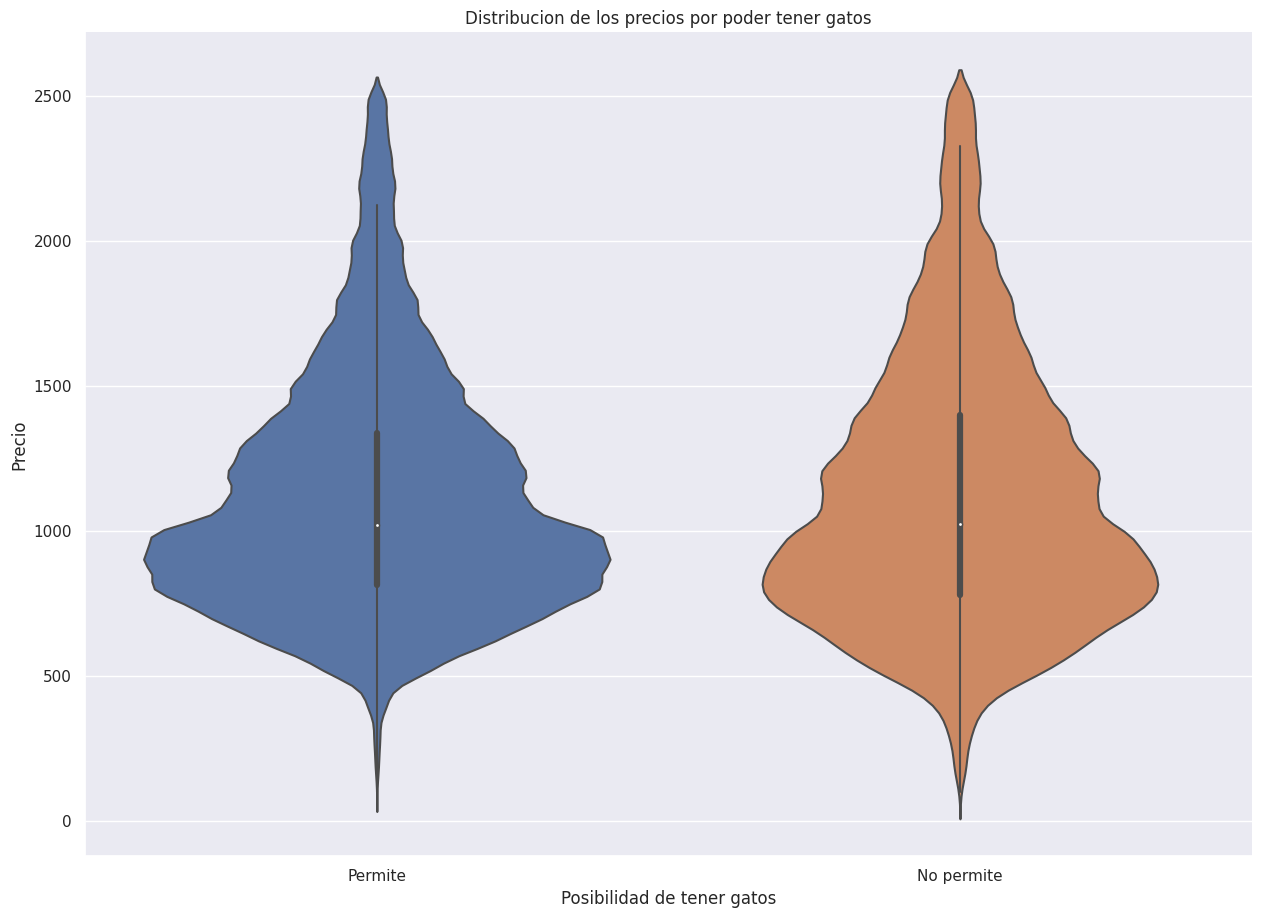

In [ ]:
sns.catplot(x = "cats_allowed", y = "price", data = df1, kind = "violin")
fig = plt.gcf()
fig.set_size_inches(15,10)
plt.xlabel('Posibilidad de tener gatos', size=(12))
plt.ylabel('Precio', size=(12))
plt.title('Distribucion de los precios por poder tener gatos')

Se puede apreciar que las distribuciones de precios no varian sustancialmente ante la presencia de poder tener perros o gatos, por ende no estamos en condiciones de afirmar que hay diferencias entre los precios en cuanto a poder tener animales en el alojamiento o no. 

En cuanto a fumar, ¿Existe diferencia en los precios?

Text(0.5, 1.0, 'Distribucion de precios por poder fumar')

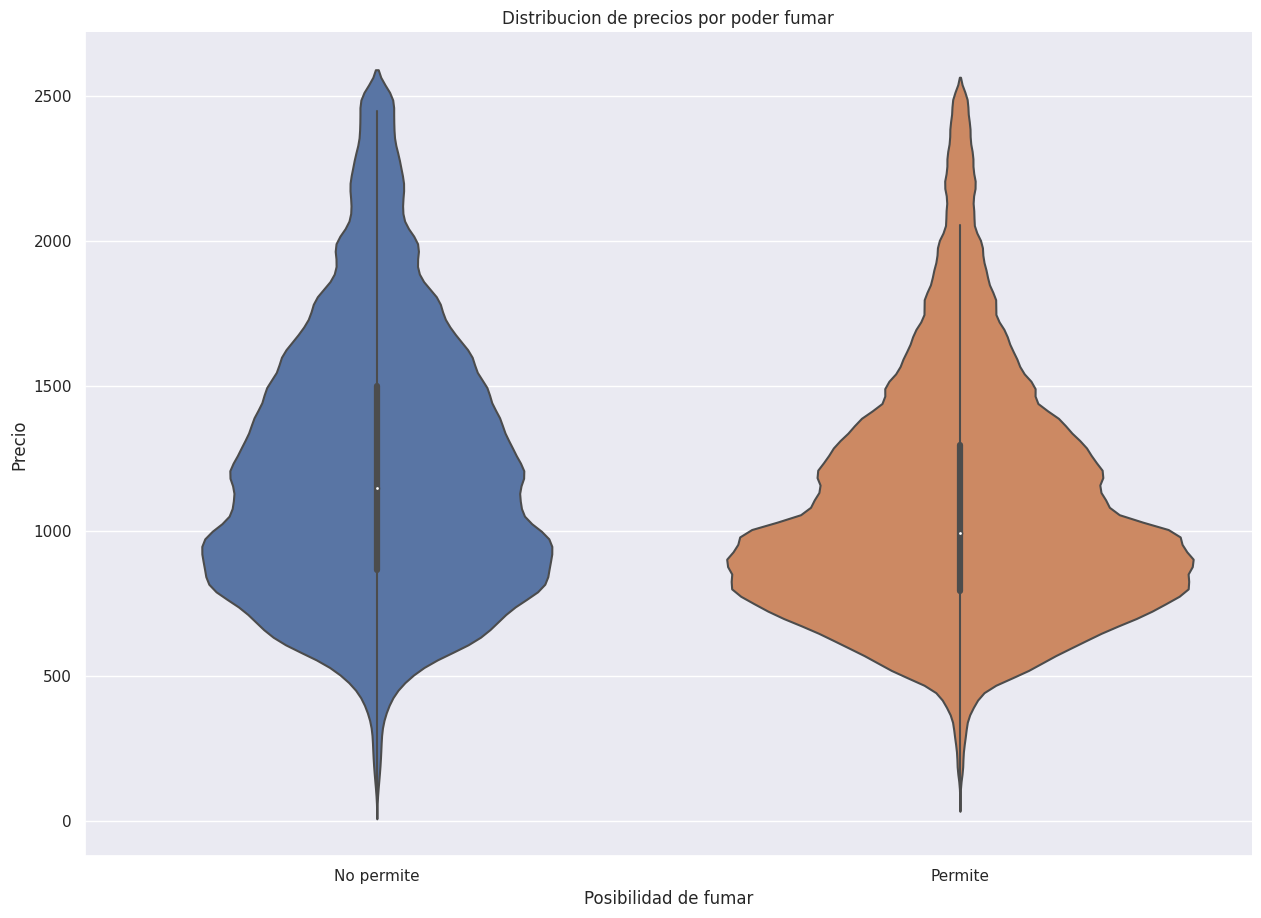

In [ ]:
sns.catplot(x = "smoking_allowed", y = "price", data = df1, kind = "violin")
fig = plt.gcf()
fig.set_size_inches(15,10)
plt.xlabel('Posibilidad de fumar', size=(12))
plt.ylabel('Precio', size=(12))
plt.title('Distribucion de precios por poder fumar')

A simple vista pareceria que en los alquileres que no se puede fumar tienen un precio mayor, a los que si permiten esta ultima accion. 
Podria ser una buena opcion para aquellas personas que esten buscando alquileres baratos, independientemente de si fume o no.

## Entrenamiento de los datos

---



In [ ]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

Importamos LabelEnconder para poder clasificar las variables no numericas del dataset

In [191]:
reemplazo2 = {'No permite': 0,'Permite': 1}
df1['dogs_allowed'] = df1['dogs_allowed'].replace(reemplazo2)
df1['cats_allowed'] = df1['cats_allowed'].replace(reemplazo2)
df1['smoking_allowed'] = df1['smoking_allowed'].replace(reemplazo2)

In [192]:
le=LabelEncoder()
db=df1

In [193]:
db["region"]=le.fit_transform(df1["region"])
db["type"]=le.fit_transform(df1["type"])
db["state"]=le.fit_transform(df1["state"])

In [194]:
db.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 368470 entries, 7049044568 to 7049050010
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   region                   368470 non-null  int64  
 1   price                    368470 non-null  int64  
 2   type                     368470 non-null  int64  
 3   sqfeet                   368470 non-null  int64  
 4   beds                     368470 non-null  int64  
 5   baths                    368470 non-null  int64  
 6   cats_allowed             368470 non-null  int64  
 7   dogs_allowed             368470 non-null  int64  
 8   smoking_allowed          368470 non-null  int64  
 9   wheelchair_access        368470 non-null  int64  
 10  electric_vehicle_charge  368470 non-null  int64  
 11  comes_furnished          368470 non-null  int64  
 12  laundry_options          368470 non-null  int64  
 13  parking_options          368470 non-null  int6

Hay problemas porque tenemos datos que son del tipo objecto y eso no permite que se utilice LabelEconder entonces vamos a realizar transformaciones

In [195]:
db.laundry_options = db.laundry_options.replace([0], [np.nan])
db.parking_options = db.parking_options.replace([0], [np.nan])

Reemplazamos los 0 por valores NaN

In [196]:
db["laundry_options"]=le.fit_transform(df1["laundry_options"])
db["parking_options"]=le.fit_transform(df1["parking_options"])

In [197]:
db.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 368470 entries, 7049044568 to 7049050010
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   region                   368470 non-null  int64  
 1   price                    368470 non-null  int64  
 2   type                     368470 non-null  int64  
 3   sqfeet                   368470 non-null  int64  
 4   beds                     368470 non-null  int64  
 5   baths                    368470 non-null  int64  
 6   cats_allowed             368470 non-null  int64  
 7   dogs_allowed             368470 non-null  int64  
 8   smoking_allowed          368470 non-null  int64  
 9   wheelchair_access        368470 non-null  int64  
 10  electric_vehicle_charge  368470 non-null  int64  
 11  comes_furnished          368470 non-null  int64  
 12  laundry_options          368470 non-null  int64  
 13  parking_options          368470 non-null  int6

Solucionado, ahora pasamos a realizar el entrenamiento de los datos:

In [198]:
x=db.drop(columns=["price"])
y=db["price"]

La variable a predecir sera el precio, por ende la sacamos de db que es el objeto que habiamos creado anteriormente en base al DataFrame que habiamos utilizado anteriormente en la limpieza de los datos.

In [200]:
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()
x_scaled=scalar.fit_transform(x)

Realizamos el escalado de los datos contenidos en x

In [201]:
print(x_scaled)

[[ 8.38709916e-01 -3.83437121e-01  3.03164899e-01 ...  4.05615640e-01
  -1.60886507e+00 -1.31923427e+00]
 [ 8.38709916e-01  2.54400774e+00  7.57180978e-02 ...  3.98146381e-01
  -1.60846209e+00 -1.31923427e+00]
 [ 8.38709916e-01 -3.83437121e-01  2.09024691e+00 ...  4.18462111e-01
  -1.60379914e+00 -1.31923427e+00]
 ...
 [ 8.38709916e-01 -3.83437121e-01 -3.99852486e-01 ...  4.03572626e-01
  -1.60598670e+00 -1.31923427e+00]
 [ 8.38709916e-01 -3.83437121e-01  1.87173386e-03 ...  4.07282739e-01
  -1.60351130e+00 -1.31923427e+00]
 [ 8.38709916e-01 -3.83437121e-01 -5.42515027e-02 ...  3.89173464e-01
  -1.60742588e+00 -1.31923427e+00]]


Volvemos a ver con un mapa de calor como quedaron los datos con el escalado

<Axes: >

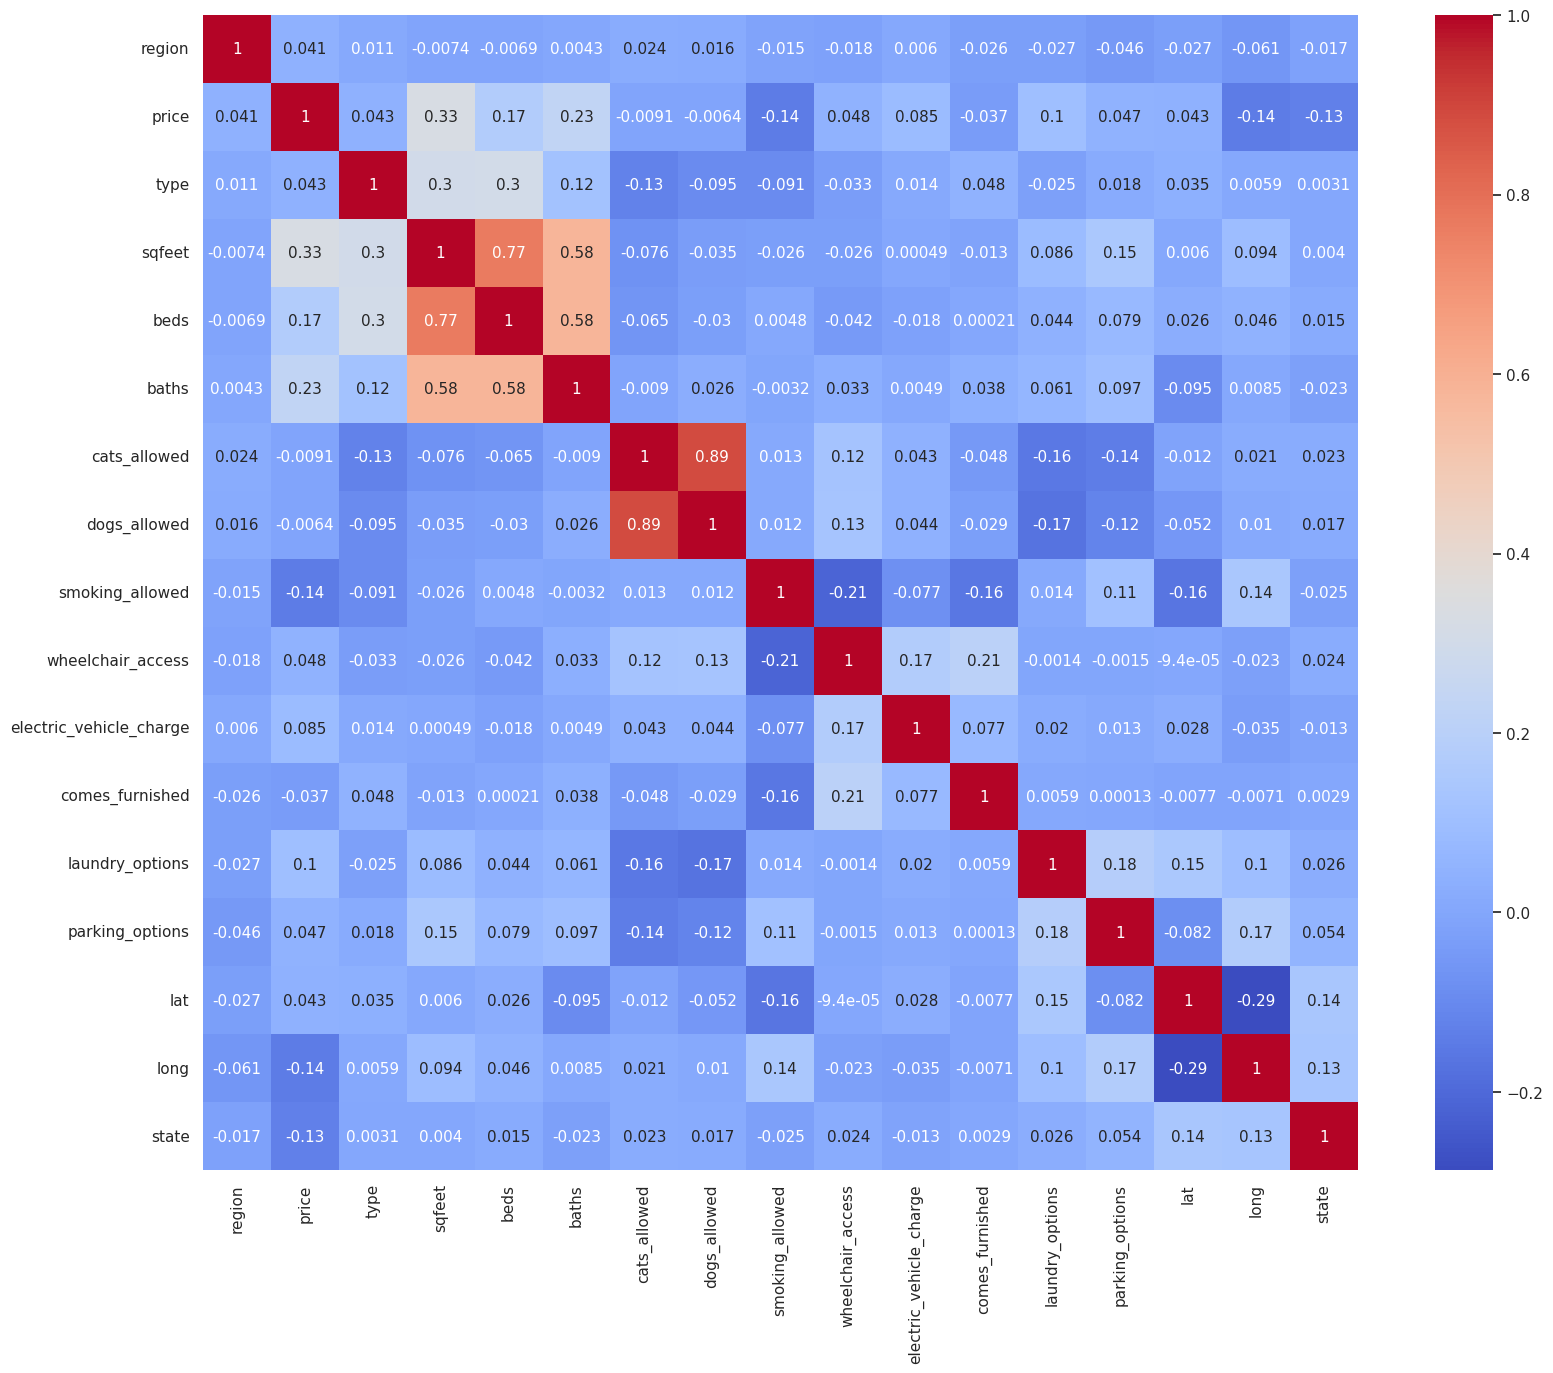

In [202]:
corrl = db.corr()
plt.figure(figsize=(20,15))
sns.heatmap(corrl, cbar=True, square= True, annot= True, annot_kws={'size':11}, cmap='coolwarm')

Importamos desde Scikit learn el test de entrenamiento:

In [203]:
from sklearn.model_selection import train_test_split

In [204]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size = 0.30,random_state=500)

In [205]:
from sklearn.linear_model import LinearRegression
lin = LinearRegression()

In [206]:
models = {"Regresion lineal" : lin}
scores= { }

In [207]:
for key, value in models.items():    
    model = value
    model.fit(x_train, y_train)
    scores[key] = model.score(x_test, y_test)

In [208]:
cuadro_puntaje = pd.DataFrame(scores, index=["Puntaje de R2"]).T
cuadro_puntaje

,Puntaje de R2
Regresion lineal,0.204896


Vemos que con la regresion lineal tenemos un 26% aproximadamente de precision por ende, no es nada viable utilizar este tipo de estimacion para el presente dataset, debemos buscar otro tipo de forma para entrenar los datos.

Probemos con el metodo de Bosques Aleatorios:

In [209]:
from sklearn.ensemble import RandomForestRegressor
ran = RandomForestRegressor(n_estimators=90)

In [210]:
models2 = {"Bosques Aleatorios" : ran}
scores= { }

In [211]:
for key, value in models2.items():    
    model2 = value
    model2.fit(x_train, y_train)
    scores[key] = model2.score(x_test, y_test)

In [212]:
cuadro_puntaje = pd.DataFrame(scores, index=["Puntaje de R2"]).T
cuadro_puntaje

,Puntaje de R2
Bosques Aleatorios,0.892768


Vemos que el resultado mejoro muchisimo con respecto a la regresion lineal, por ende vamos a evaluar con metricas este modelo de entrenamiento con bosques aleatorios

In [213]:
y_pred=ran.predict(x_test)

In [214]:
from sklearn import metrics
print('R2:',metrics.r2_score(y_test, y_pred))
print('MAE:',metrics.mean_absolute_error(y_test, y_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_pred))

R2: 0.8927677274761826
MAE: 65.25086147103521
MSE: 19118.678315290494


Vemos que el R2 muestra casi un 90% por lo tanto podriamos decir que las variables aplicadas en el metodo de bosques aleatorios explican de manera aceptable el precio de los alquileres.